<a href="https://colab.research.google.com/github/yeesem/Machine-Learning/blob/main/Decision_Tree_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/yeesem/Machine-Learning/main/kyphosis.csv')

In [22]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [41]:
#Inbalance data
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

<Axes: xlabel='Kyphosis', ylabel='count'>

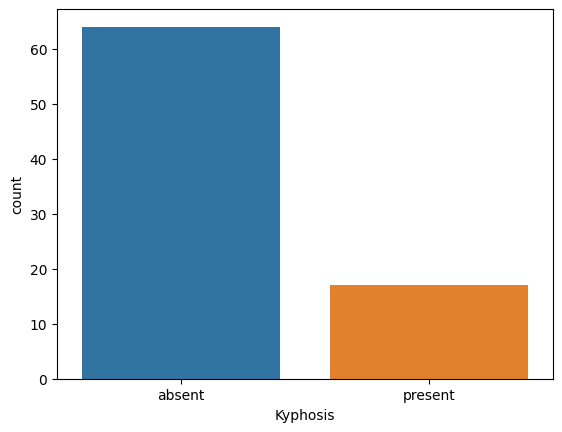

In [8]:
sns.countplot(x='Kyphosis',data=df)

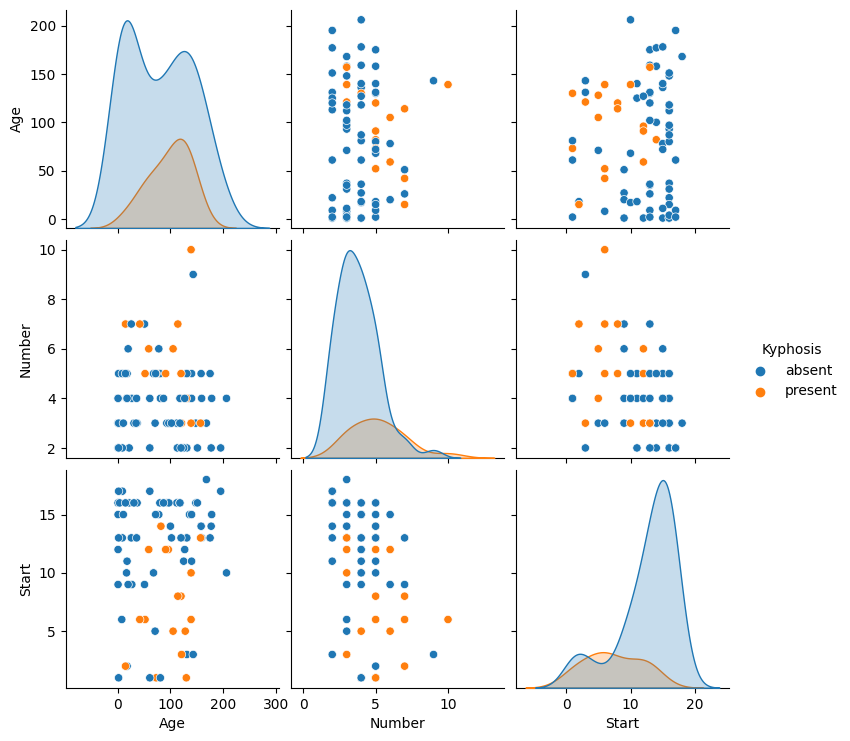

In [10]:
sns.pairplot(df,hue='Kyphosis')

In [11]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtree = DecisionTreeClassifier()

In [27]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
prediction = dtree.predict(X_test)

In [46]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot


In [48]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

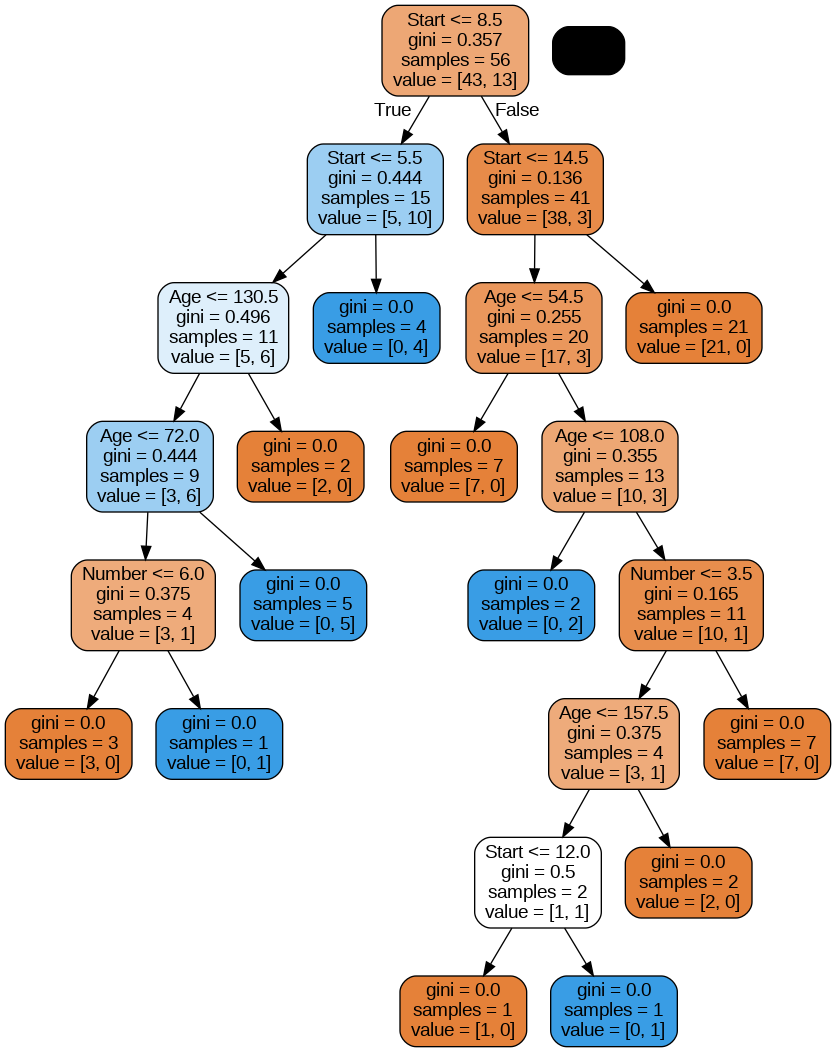

In [50]:
dot_data =StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


In [29]:
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))

[[15  6]
 [ 1  3]]


              precision    recall  f1-score   support

      absent       0.94      0.71      0.81        21
     present       0.33      0.75      0.46         4

    accuracy                           0.72        25
   macro avg       0.64      0.73      0.64        25
weighted avg       0.84      0.72      0.75        25



In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier(n_estimators=200)

In [34]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [35]:
pred = rfc.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix,classification_report

In [39]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[18  3]
 [ 3  1]]


              precision    recall  f1-score   support

      absent       0.86      0.86      0.86        21
     present       0.25      0.25      0.25         4

    accuracy                           0.76        25
   macro avg       0.55      0.55      0.55        25
weighted avg       0.76      0.76      0.76        25

